In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [56]:
df=pd.read_csv('titanic_cleaned.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,isalone,Title,AgeGroup,Age_scaled,Fare_scales,Familysize_scaled
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,2,2,0,Mr,YoungAdult,-0.565736,-0.502445,0.059160
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0,2,0,Mrs,Adult,0.663861,0.786845,0.059160
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,2,1,1,Miss,YoungAdult,-0.258337,-0.488854,-0.560975
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2,2,0,Mrs,YoungAdult,0.433312,0.420730,0.059160
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,2,1,1,Mr,YoungAdult,0.433312,-0.486337,-0.560975


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    int64  
 5   Age                891 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    int64  
 9   Fare               891 non-null    float64
 10  Cabin              891 non-null    int64  
 11  Embarked           891 non-null    int64  
 12  Familysize         891 non-null    int64  
 13  isalone            891 non-null    int64  
 14  Title              891 non-null    object 
 15  AgeGroup           891 non-null    object 
 16  Age_scaled         891 non

In [58]:
df=df.drop(['Name','Title'],axis=1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Sex                891 non-null    int64  
 4   Age                891 non-null    float64
 5   SibSp              891 non-null    int64  
 6   Parch              891 non-null    int64  
 7   Ticket             891 non-null    int64  
 8   Fare               891 non-null    float64
 9   Cabin              891 non-null    int64  
 10  Embarked           891 non-null    int64  
 11  Familysize         891 non-null    int64  
 12  isalone            891 non-null    int64  
 13  AgeGroup           891 non-null    object 
 14  Age_scaled         891 non-null    float64
 15  Fare_scales        891 non-null    float64
 16  Familysize_scaled  891 non

In [60]:
le=LabelEncoder()
df['AgeGroup']=le.fit_transform(df['AgeGroup'])

In [61]:
corr=df.corr()

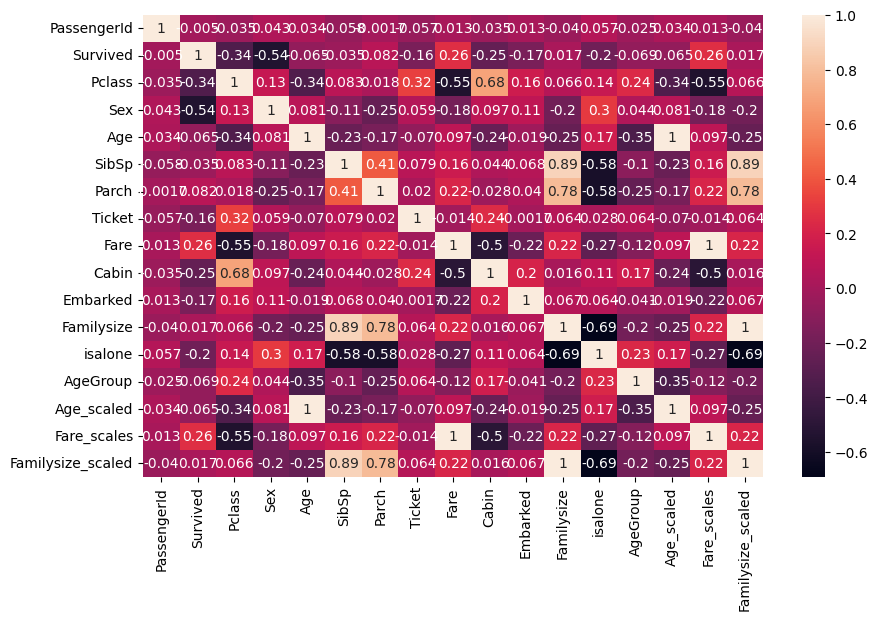

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

In [63]:
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [65]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train_scaled,y_train)
pred_linear=svm_linear.predict(X_test_scaled)
print("svm linear accuracy",accuracy_score(pred_linear,y_test))

svm linear accuracy 0.7821229050279329


In [66]:
svm_rbf=SVC(kernel='rbf',C=1,gamma='scale')
svm_rbf.fit(X_train_scaled,y_train)
rbf_pred=svm_rbf.predict(X_test_scaled)
print('RBF SVM accuracy',accuracy_score(y_test,rbf_pred))

RBF SVM accuracy 0.8156424581005587


In [67]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(X_train_scaled,y_train)
poly_pred=svm_poly.predict(X_test_scaled)
print('SVM POLY accuracy',accuracy_score(poly_pred,y_test))

SVM POLY accuracy 0.8212290502793296


In [68]:
knn=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
knn.fit(X_train_scaled,y_train)
knn_pred=knn.predict(X_test_scaled)
print('KNN accuracy',accuracy_score(knn_pred,y_test))


KNN accuracy 0.8044692737430168


In [69]:
knn_manhatan=KNeighborsClassifier(n_neighbors=8,metric='manhattan')
knn_manhatan.fit(X_train_scaled,y_train)
knn_manhatan_pred=knn_manhatan.predict(X_test_scaled)
print("knn manhatan accuracy",accuracy_score(knn_manhatan_pred,y_test))

knn manhatan accuracy 0.8212290502793296


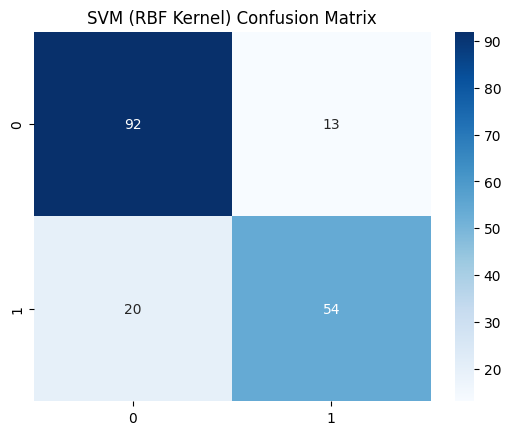

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [70]:
cm = confusion_matrix(y_test, rbf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM (RBF Kernel) Confusion Matrix")
plt.show()

print(classification_report(y_test, rbf_pred))
